In [28]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np

In [31]:
df_us = pd.read_csv('/content/drive/MyDrive/Data mining/Project/clean_youtube_dataframe_us.csv',engine='python')

In [32]:
df_in = pd.read_csv('/content/drive/MyDrive/Data mining/Project/clean_youtube_dataframe_in.csv',engine='python')

In [33]:
df_ca = pd.read_csv('/content/drive/MyDrive/Data mining/Project/clean_youtube_dataframe_ca.csv',engine='python')

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
from matplotlib import ticker

### **Distributions on US dataset**

In [35]:
df_us = df_us.drop(['Unnamed: 0'],axis=1)

In [36]:
df_us.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_of_day,day_of_week
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22.0,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156908.0,5855.0,35313.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Evening,Tuesday
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.0,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688.0,146739.0,2794.0,16549.0,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Afternoon,Tuesday
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24.0,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.0,353787.0,2628.0,40221.0,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Afternoon,Tuesday
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10.0,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771.0,23251.0,1856.0,7647.0,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Afternoon,Tuesday
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26.0,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889.0,45802.0,964.0,2196.0,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Afternoon,Tuesday


<ipython-input-44-626f947e6c40>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i+1)


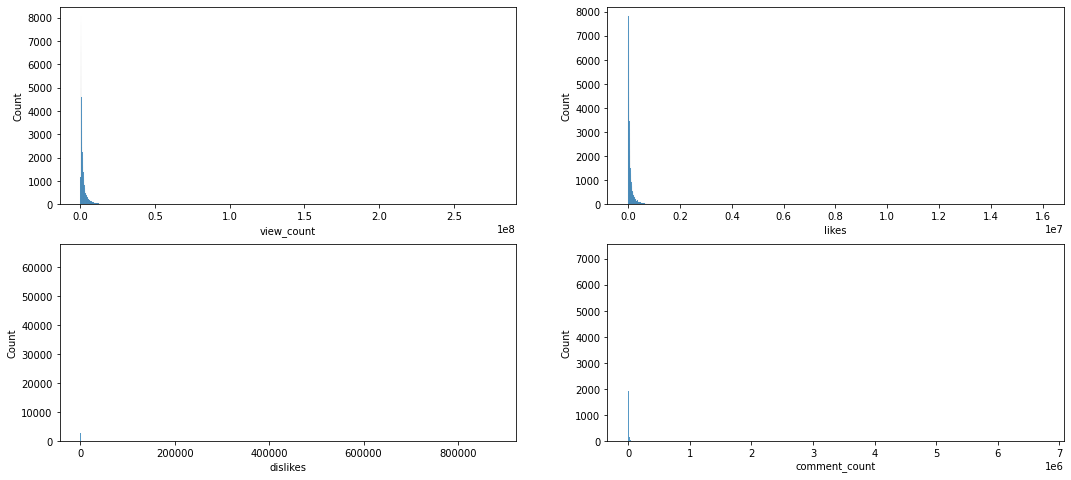

In [44]:
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

distributions = ['view_count', 'likes', 'dislikes', 'comment_count']
for i in range(0,4):
    plt.subplot(2,2,i+1)
    z = np.abs(stats.zscore(df_us[distributions[i]]))
    sns.histplot(x = distributions[i],data = df_us[~df_ca.isin(df_us.iloc[np.where(z > 3)])].dropna(how='all'))

**Distribution of US Trending Videos Views**



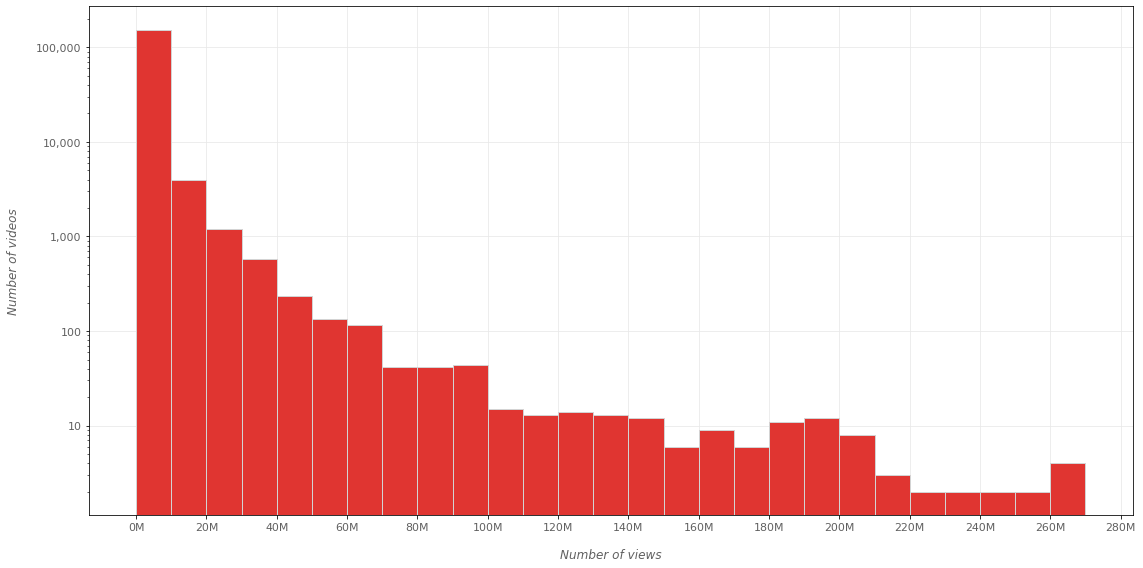

In [59]:
ax = df_us['view_count'].plot(kind='hist', bins=np.arange(0, 280e6, 10e6)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray);
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()

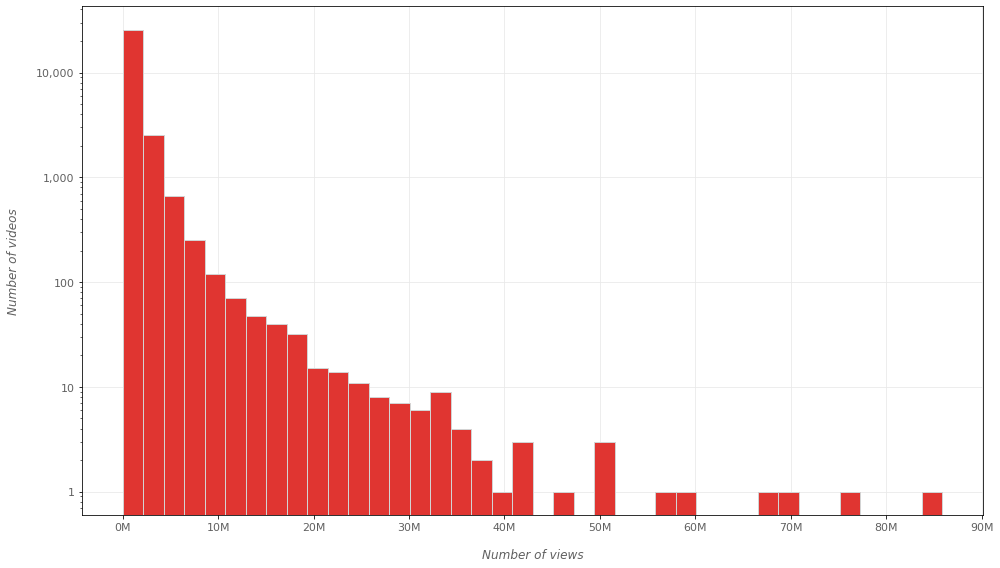

In [52]:
# Views of trending videos when entering the trending list

df_entry = df_us.drop_duplicates(subset=['video_id'])

ax = df_entry['view_count'].plot(kind='hist', figsize=(14,8), bins=40, logy=True,
                            lw=1, ec='lightgray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
def millions(x, pos):
    return '{}M'.format(int(x / 1000000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions));

plt.tight_layout()

**Distribution of US Trending Videos likes and dislikes**

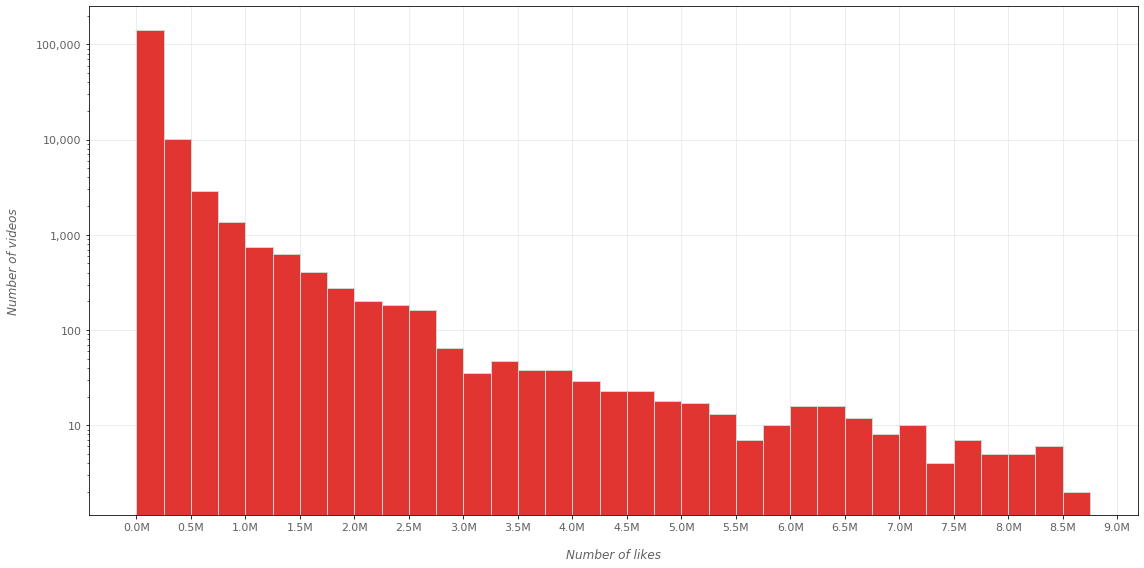

In [53]:
#Likes distribution
ax = df_us['likes'].plot(kind='hist', bins=np.arange(0, 9e6, 2.5e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()

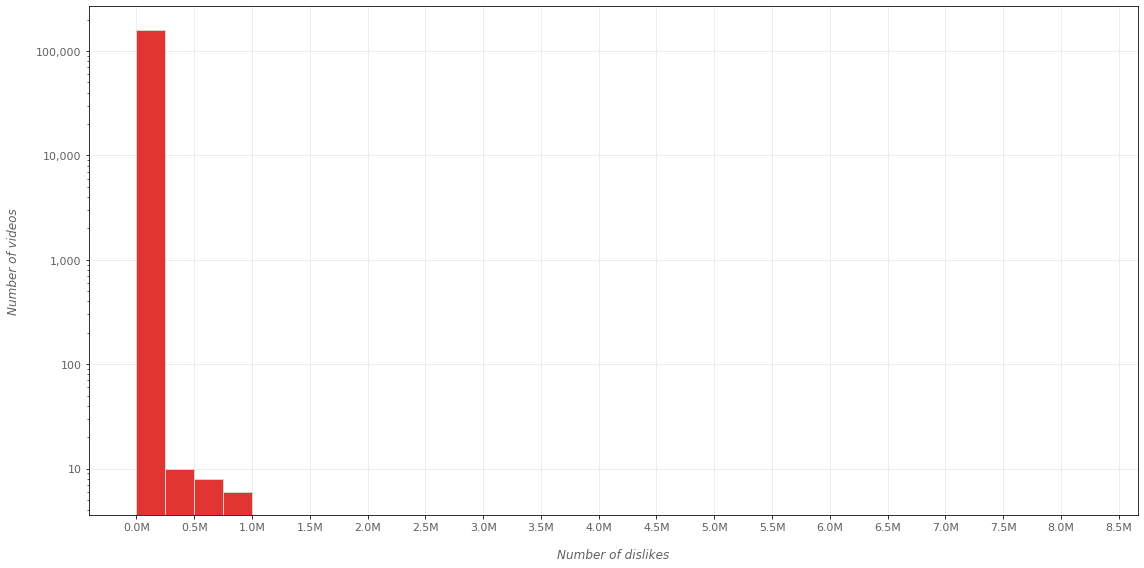

In [54]:
#Dislikes distribution
ax = df_us['dislikes'].plot(kind='hist', bins=np.arange(0, 8.5e6, 2.5e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()


### **Distributions on IN dataset**

In [ ]:
df_in = df_in.drop(['Unnamed: 0'],axis=1)

In [ ]:
df_in.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_of_day,day_of_week
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Night,Wednesday
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Morning,Tuesday
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,Morning,Tuesday
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Night,Monday
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Night,Tuesday


<ipython-input-29-6e2426c99786>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i+1)


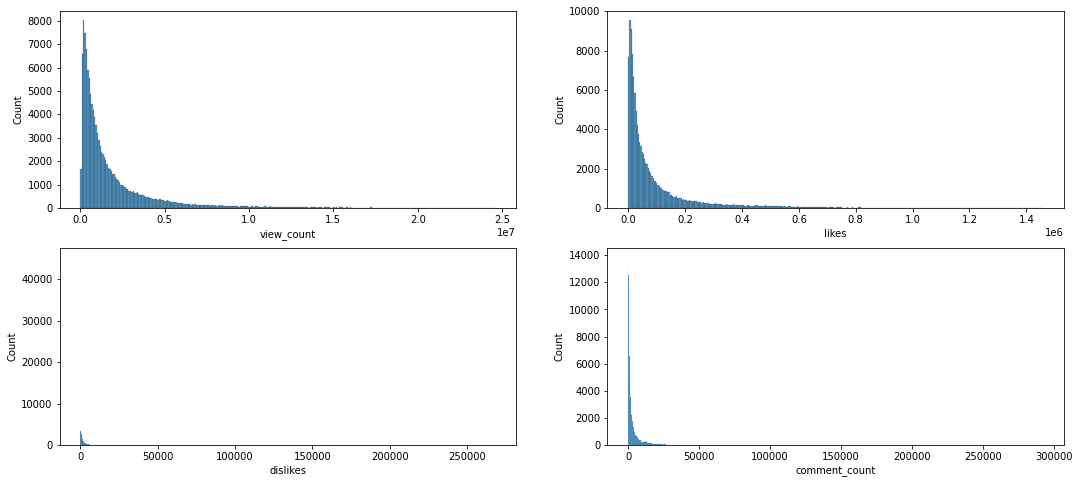

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

distributions = ['view_count', 'likes', 'dislikes', 'comment_count']
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.histplot(x = distributions[i],data = df_ca[~df_in.isin(df_in.iloc[np.where(z > 3)])].dropna(how='all'))


**Distribution of IN Trending Videos Views**

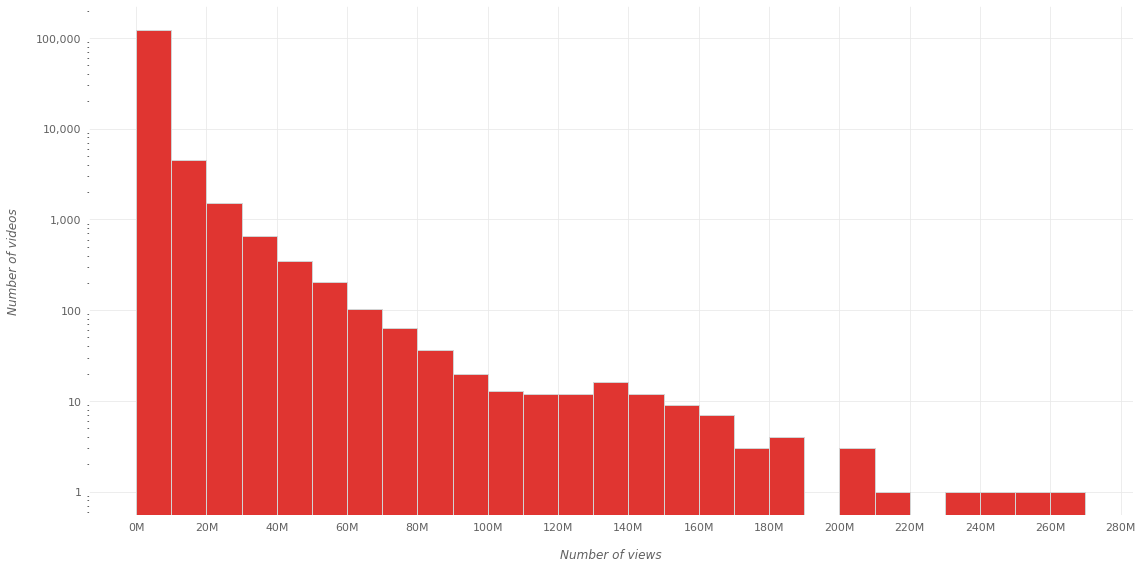

In [ ]:
ax = df_in['view_count'].plot(kind='hist', bins=np.arange(0, 280e6, 10e6)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()

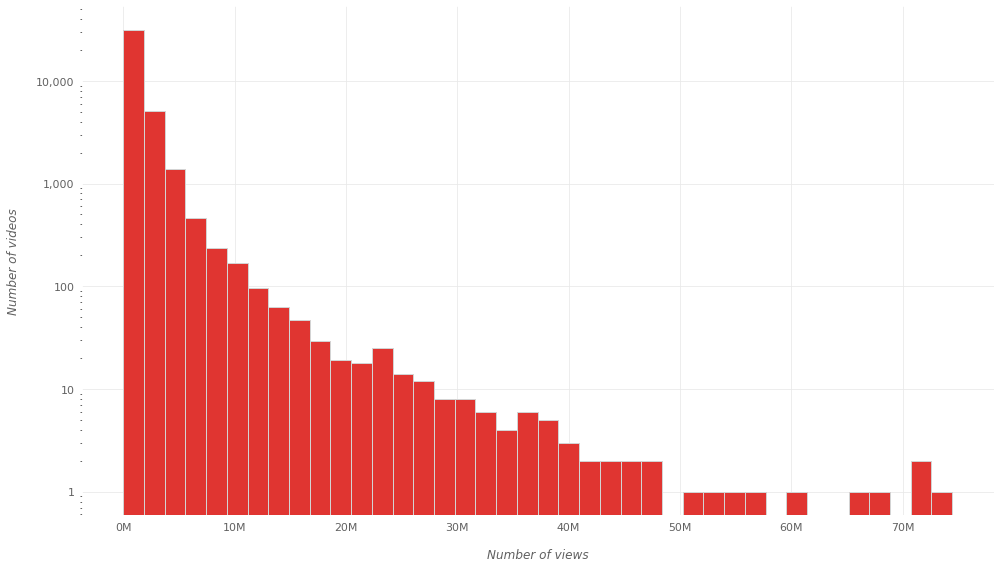

In [ ]:
# Views of trending videos when entering the trending list

df_entry = df_in.drop_duplicates(subset=['video_id'])

ax = df_entry['view_count'].plot(kind='hist', figsize=(14,8), bins=40, logy=True,
                            lw=1, ec='lightgray')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));


plt.tight_layout()

**Distribution of IN Trending Videos likes and dislikes**

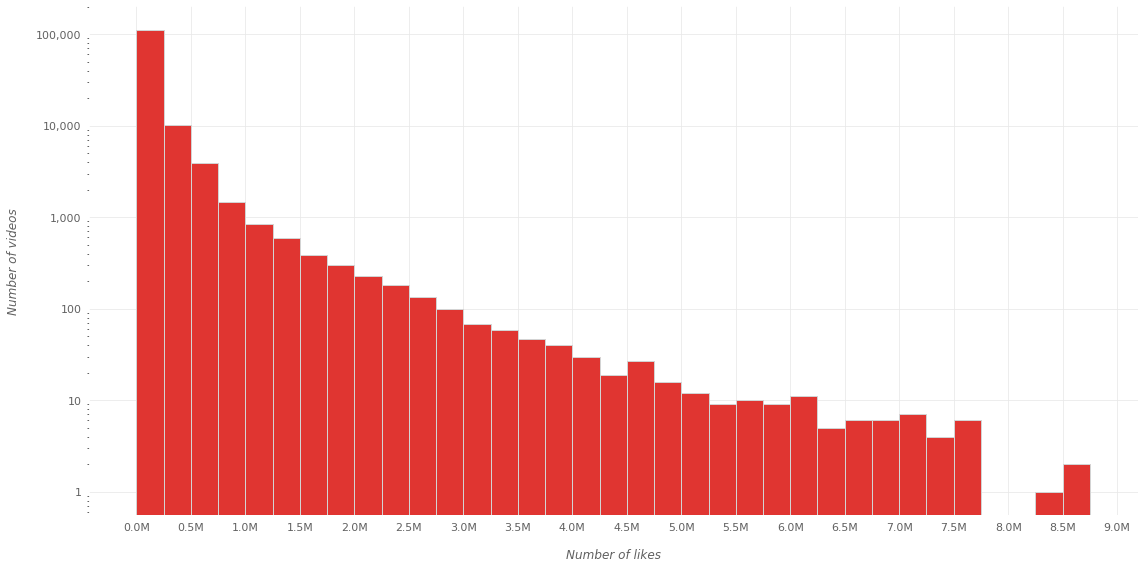

In [ ]:
#Likes distribution
ax = df_in['likes'].plot(kind='hist', bins=np.arange(0, 9e6, 2.5e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()

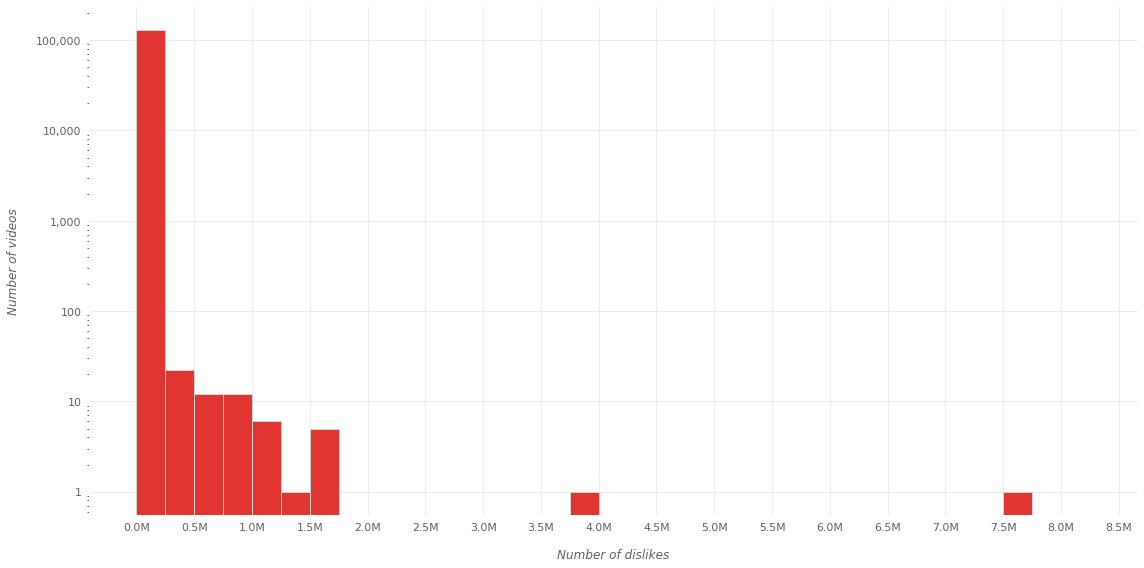

In [ ]:
#Dislikes distribution
ax = df_in['dislikes'].plot(kind='hist', bins=np.arange(0, 8.5e6, 2.5e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()


### **Distributions on CA dataset**

In [ ]:
df_ca = df_ca.drop(['Unnamed: 0'],axis=1)

In [ ]:
df_ca.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_of_day,day_of_week
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10.0,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911.0,296541.0,6180.0,30059.0,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,Morning,Tuesday
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24.0,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.0,353797.0,2628.0,40222.0,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Afternoon,Tuesday
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.0,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688.0,146740.0,2794.0,16549.0,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Afternoon,Tuesday
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22.0,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156914.0,5857.0,35331.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Evening,Tuesday
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26.0,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889.0,45803.0,964.0,2198.0,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Afternoon,Tuesday


<ipython-input-36-837b958713f0>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i+1)


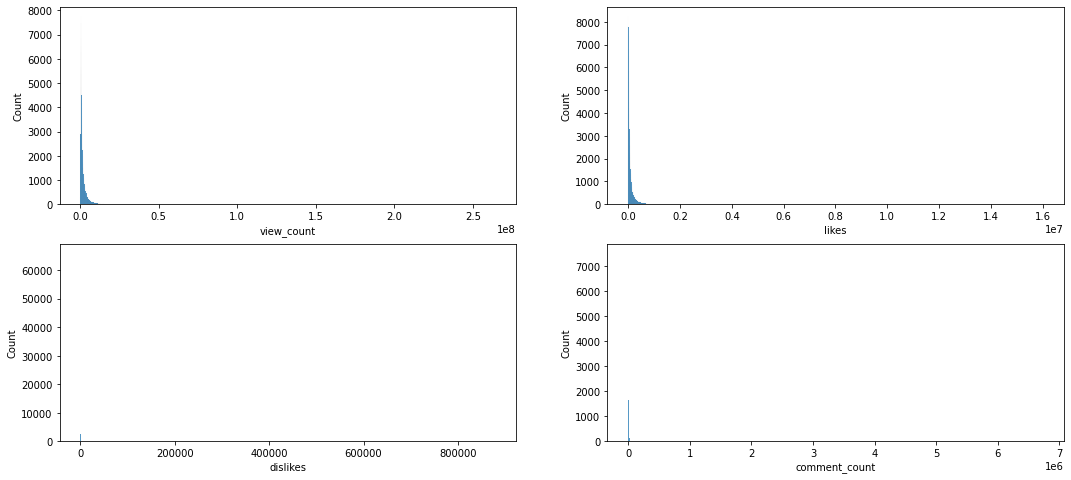

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

distributions = ['view_count', 'likes', 'dislikes', 'comment_count']
for i in range(0,4):
    plt.subplot(2,2,i+1)
    z = np.abs(stats.zscore(df_ca[distributions[i]]))
    sns.histplot(x = distributions[i],data = df_ca[~df_ca.isin(df_ca.iloc[np.where(z > 3)])].dropna(how='all'))

**Distribution of CA Trending Videos Views**

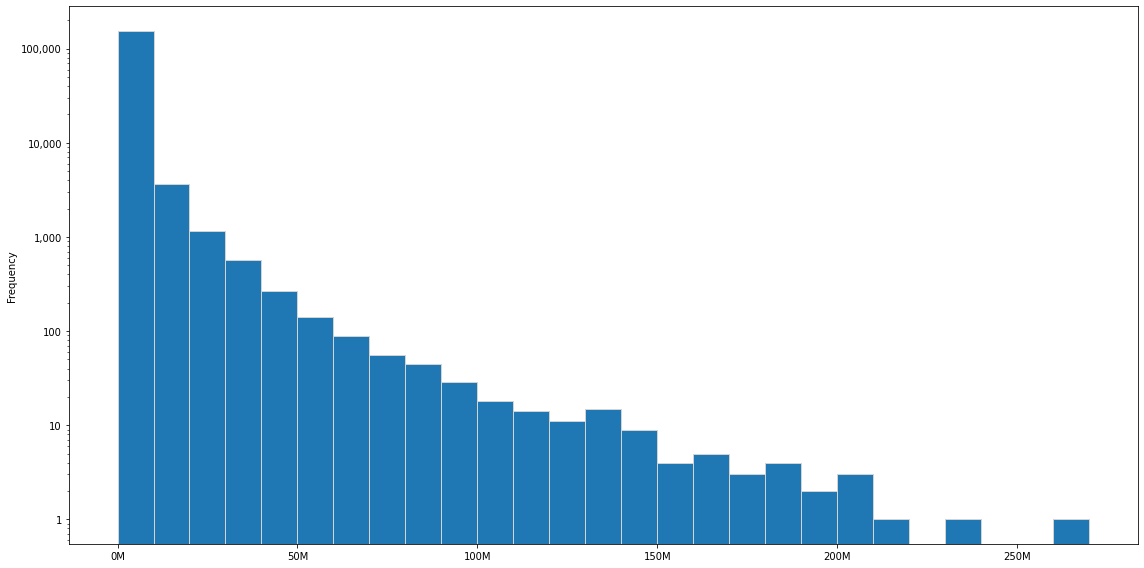

In [63]:
ax = df_ca['view_count'].plot(kind='hist', bins=np.arange(0, 280e6, 10e6)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()

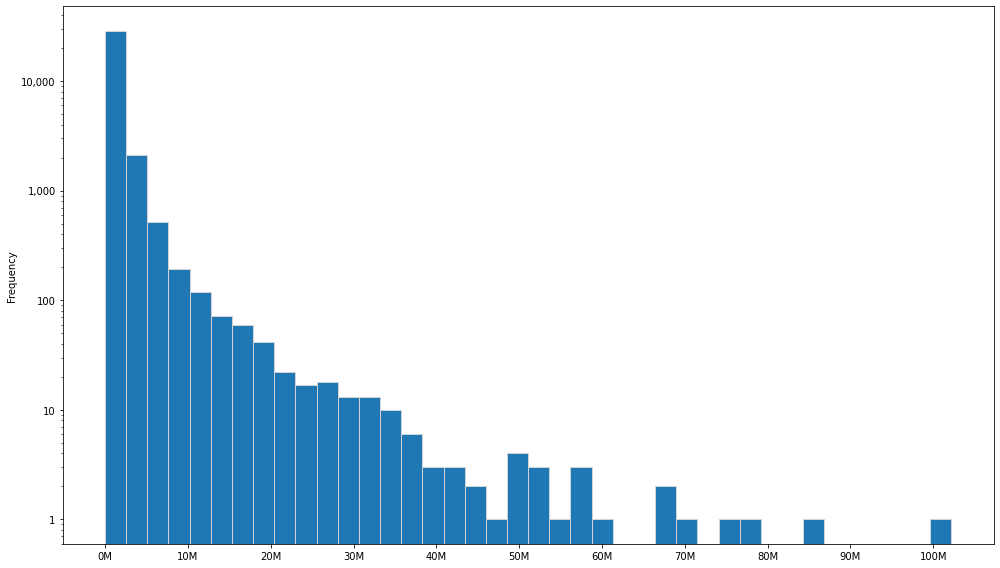

In [62]:
# Views of trending videos when entering the trending list

df_entry = df_ca.drop_duplicates(subset=['video_id'])

ax = df_entry['view_count'].plot(kind='hist', figsize=(14,8), bins=40, logy=True,
                            lw=1, ec='lightgray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
plt.tight_layout()

**Distribution of CA Trending Videos likes and dislikes**

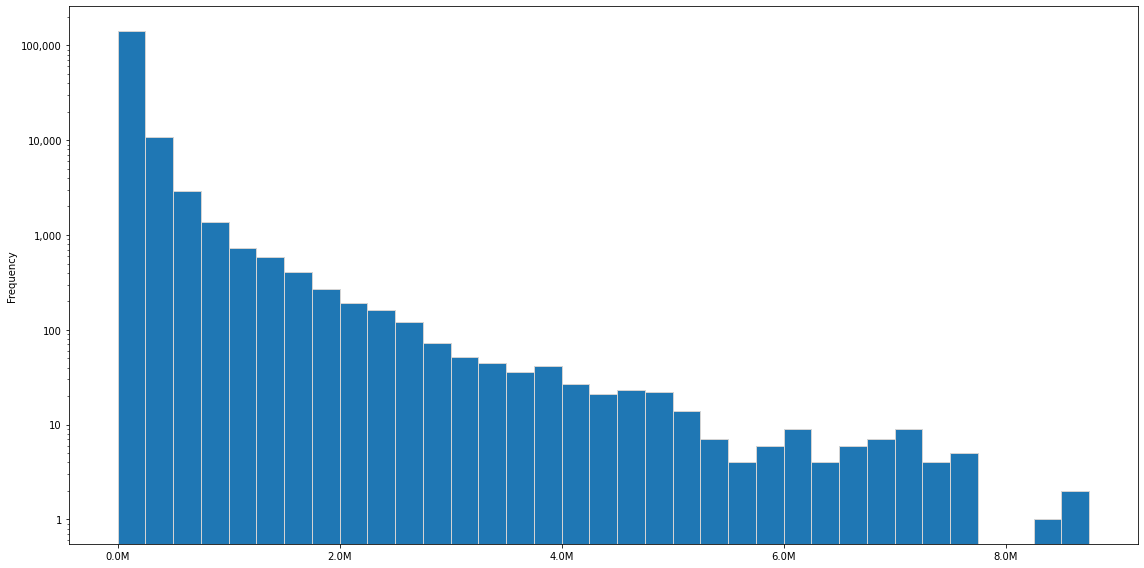

In [60]:
#Likes distribution
ax = df_ca['likes'].plot(kind='hist', bins=np.arange(0, 9e6, 2.5e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()

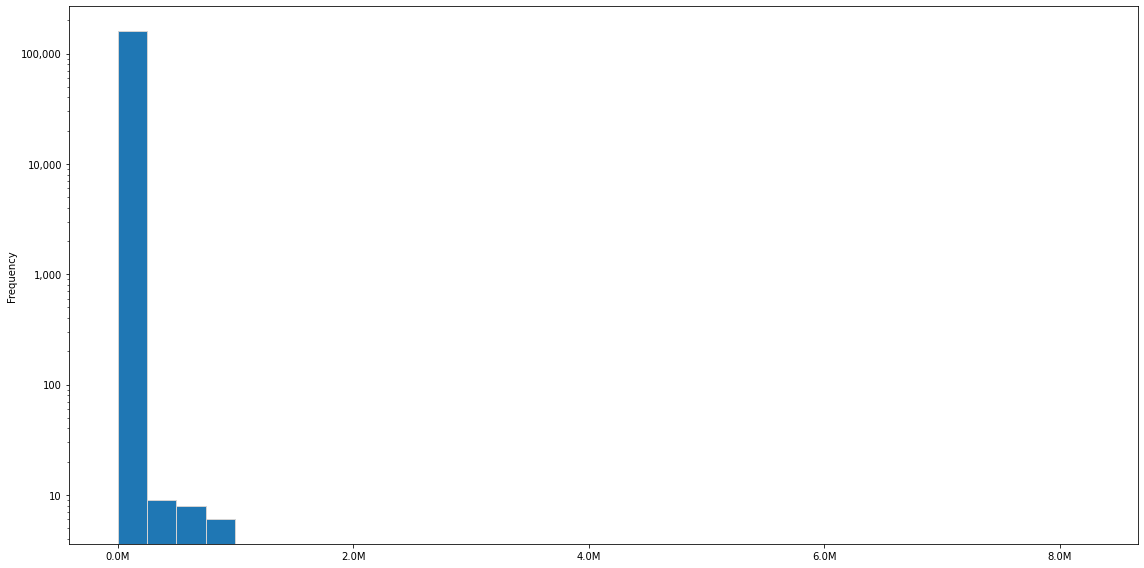

In [61]:
#Dislikes distribution
ax = df_ca['dislikes'].plot(kind='hist', bins=np.arange(0, 8.5e6, 2.5e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
